# Visualizing Energy Data
----
 The plots here are made using data downloaded from the ENTSO-E API. 


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator

def getCountryList():
    list1 = ["DE","FR", "BE","BG","HR","CZ","EE","FI","GR","HU","IT","LV","LT","LU","ME","NL","NO","PL","PT","SK","CH"]
    missing = ["DK","XK","MK","RO","SI","ES","SE"]
    return list1

def countryName(ky):
    countries = {'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DE': 'Germany', 'DK': 'Denmark', 'EE': 'Estonia', 'ES': 'Spain', 'FI': 'Finland', 'FR': 'France', 'GR': 'Greece', 'HR': 'Croatia', 'HU': 'Hungary', 'IE': 'Ireland', 'IT': 'Italy', 'LT': 'Lithuania', 'LU': 'Luxembourg', 'LV': 'Latvia', 'MT': 'Malta', 'NL': 'Netherlands', 'PL': 'Poland', 'PT': 'Portugal',  'RO': 'Romania',   'SE': 'Sweden','SI': 'Slovenia', 'SK': 'Slovakia', 'CH': 'Switzerland',"ME":"Montenegro","MK":"North Macedonia","NO":"Norway"}
    return countries[ky]

def getCountryData(code,startDate,endDate):
    csv_file = './rawData/'+code+'-202001010000-202301010000-actual-60.csv'
    start_date = pd.to_datetime(startDate)
    end_date = pd.to_datetime(endDate)
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    return filtered_data

# Method to filter hourly data based on start and end dates
def filter_data_by_date(csv_file, start_date, end_date):
    # Load CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file)
    # Convert 'startTime' column to datetime format
    df['startTime'] = pd.to_datetime(df['startTime'], format='%Y%m%d%H%M')
    #print(df)
    # Filter data based on start and end dates
    filtered_data = df[(df['startTime'] >= start_date) & (df['startTime'] <= end_date)]
    
    return filtered_data

# Method to create a line chart from hourly data
def create_line_chart(hourly_data,title):
    plt.figure(figsize=(10, 5))
    plt.plot(hourly_data['startTime'], hourly_data['percentRenewable'], marker='o', color='#04316a')
    plt.xlabel('Time')
    plt.ylabel('Percent Renewable')
    plt.title(title)
    # Format x-axis tick labels to show hours
    # hours_locator = HourLocator(interval=1)
    # hours_formatter = DateFormatter('%H:%M')
    # plt.gca().xaxis.set_major_locator(hours_locator)
    # plt.gca().xaxis.set_major_formatter(hours_formatter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## Hourly Renewable plot
----

The plots below show what percentage of electricity is produced from renewable sources across mulitple countries for the given time period. The percentages are calculated based on actual generation data. 


The time duration can be adjusted in the cell below :

In [27]:
hourly_start_date="2022-05-01"
hourly_end_date="2022-05-05"

In [48]:
def showHourlyPlot(code,start,end):
    data = getCountryData(code,start,end)
    print(countryName(code))
    create_line_chart(data,'Hourly Percent Renewable Energy in '+countryName(code)+' from '+start+' to '+end)

def showHourlyPlotsforAllCountries(start,end):
    #print(filtered_data.columns)
    clist = getCountryList()
    for c in clist :
        showHourlyPlot(c,start,end)

Germany


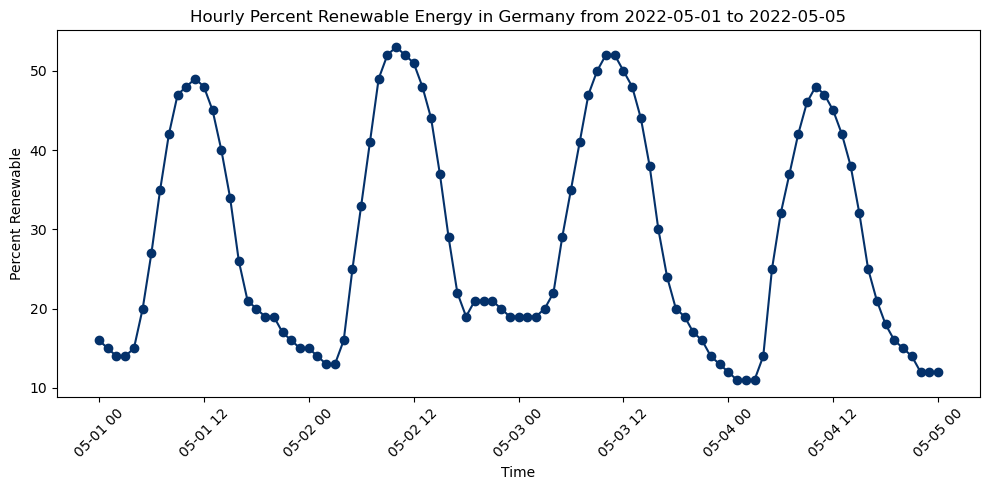

France


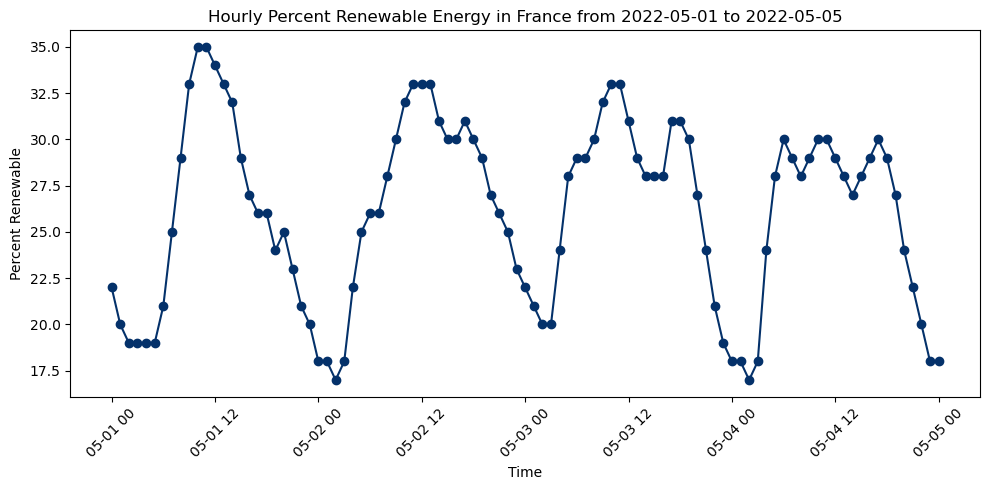

Belgium


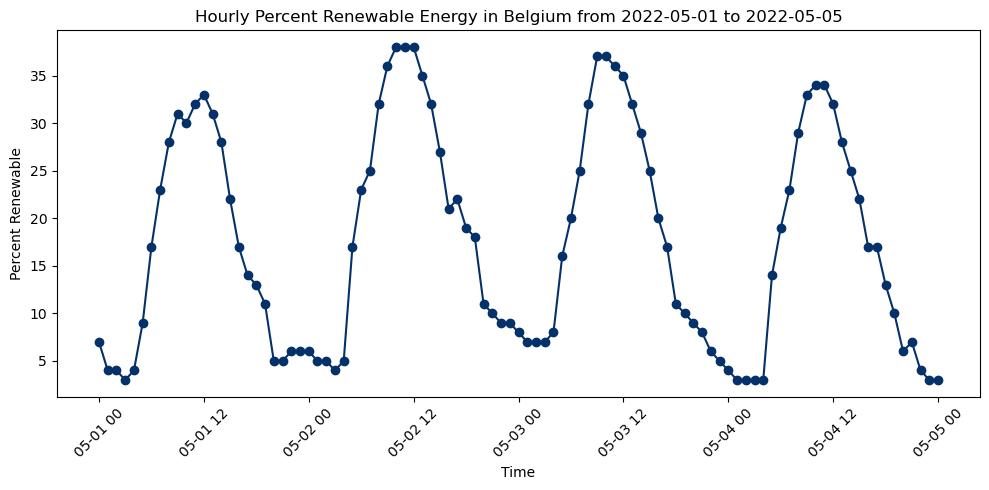

Bulgaria


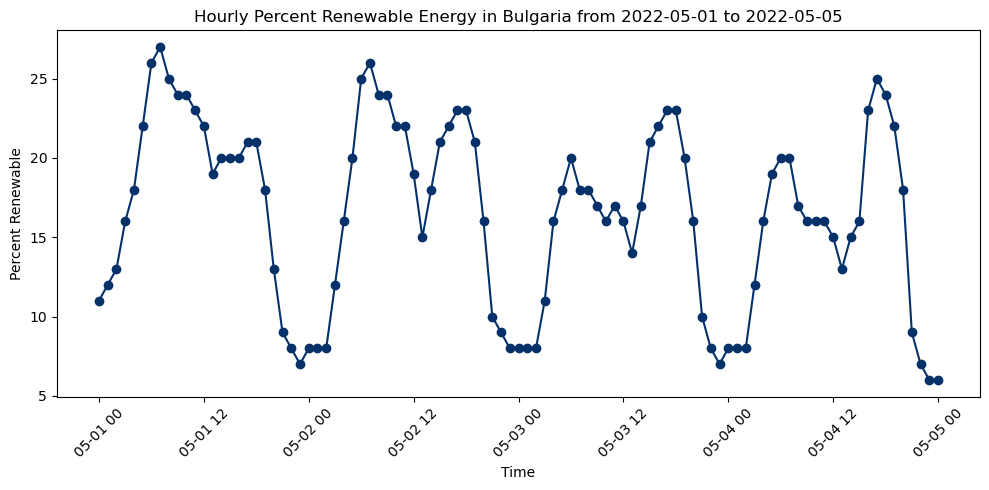

Croatia


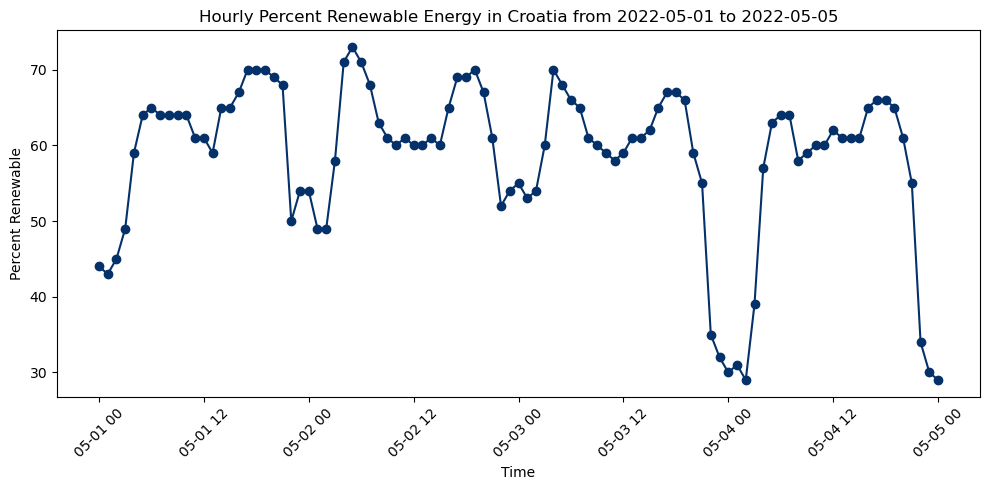

Czech Republic


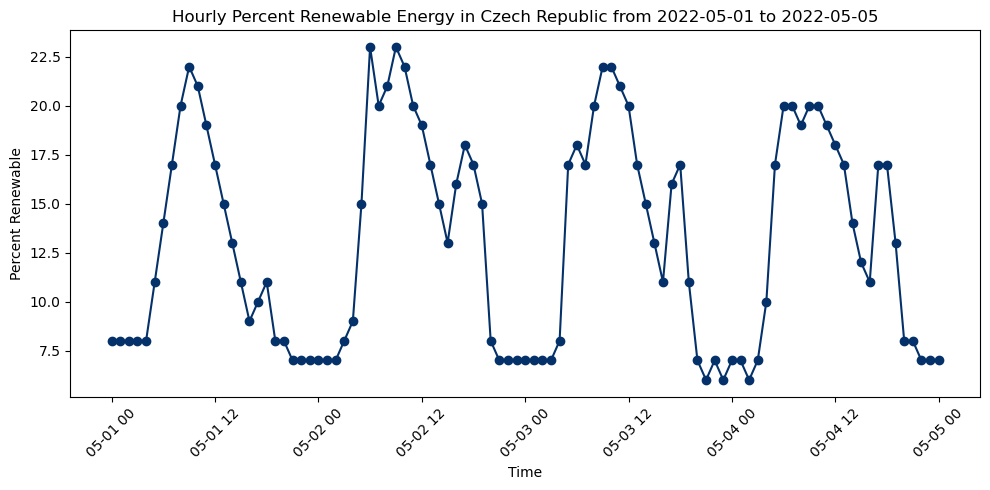

Estonia


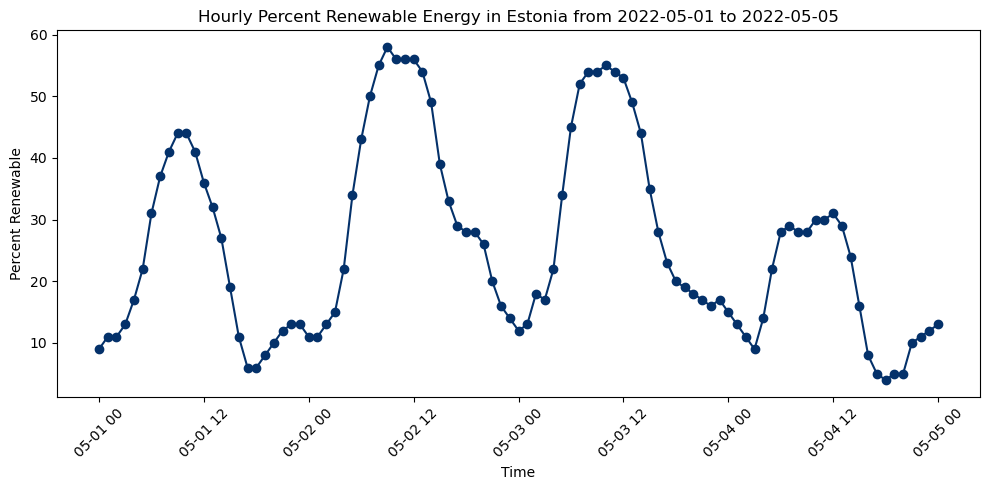

Finland


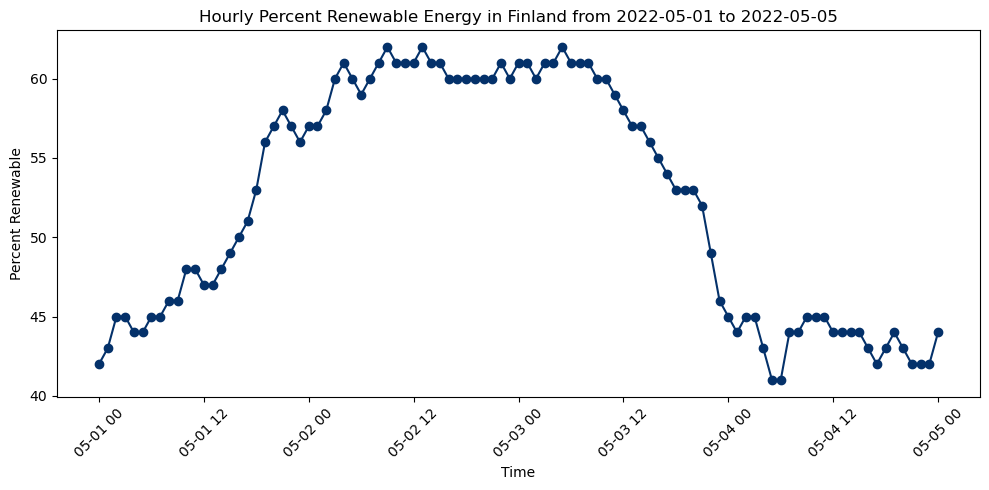

Greece


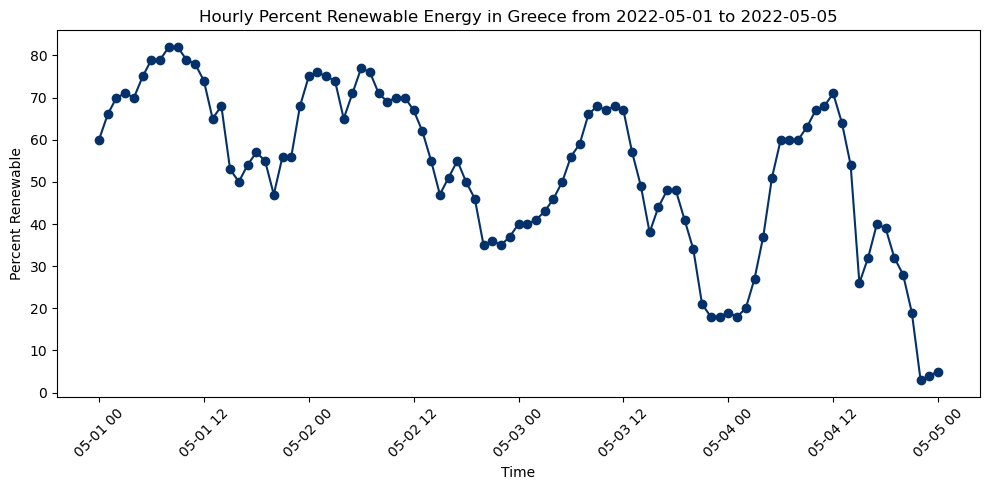

Hungary


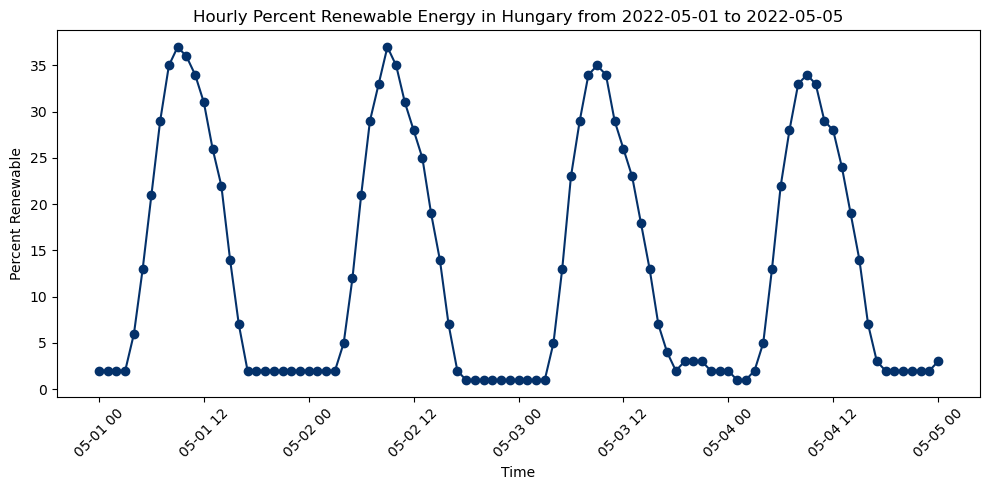

Italy


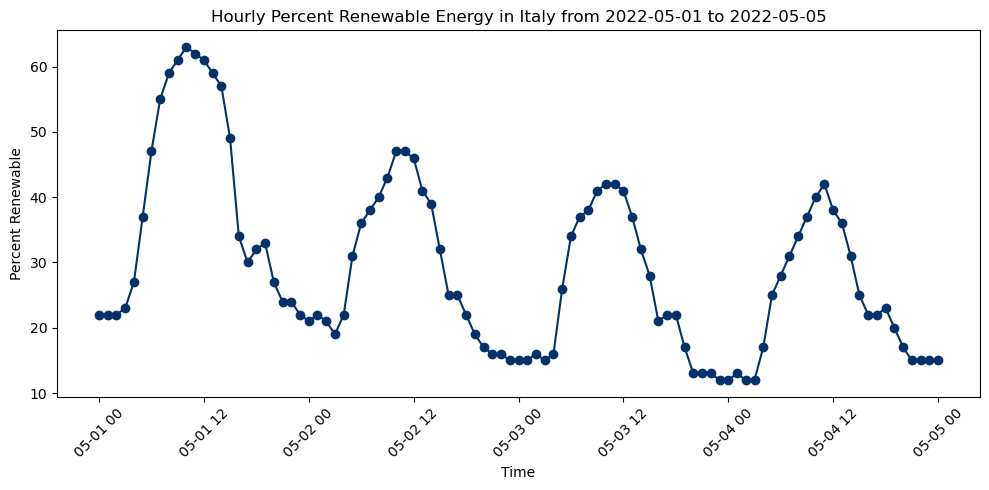

Latvia


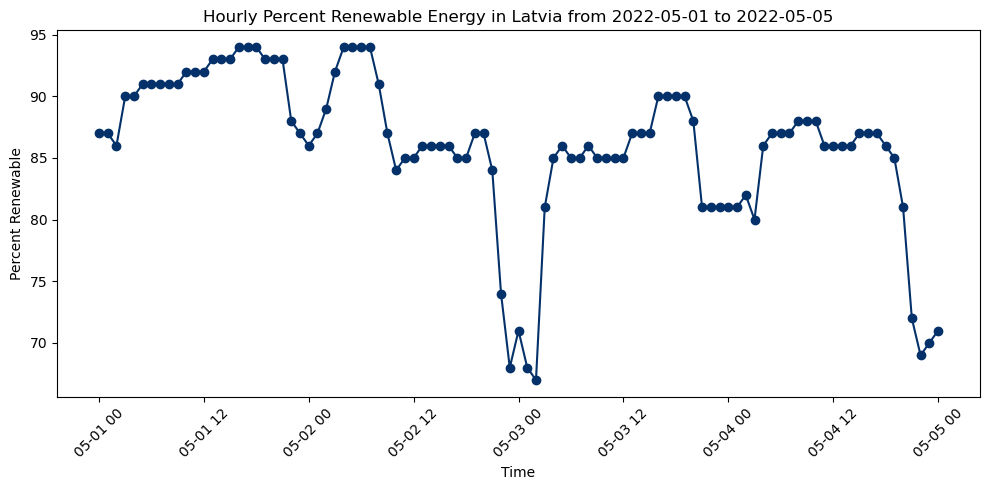

Lithuania


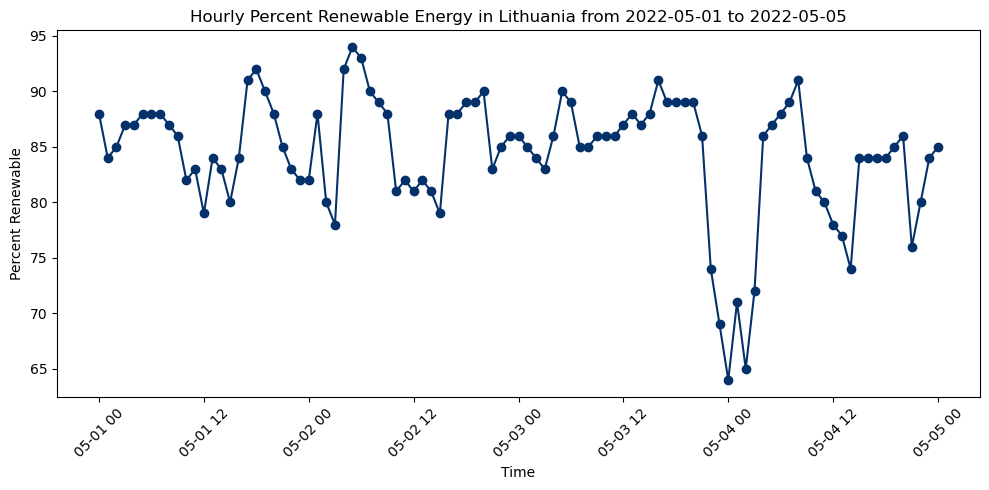

Luxembourg


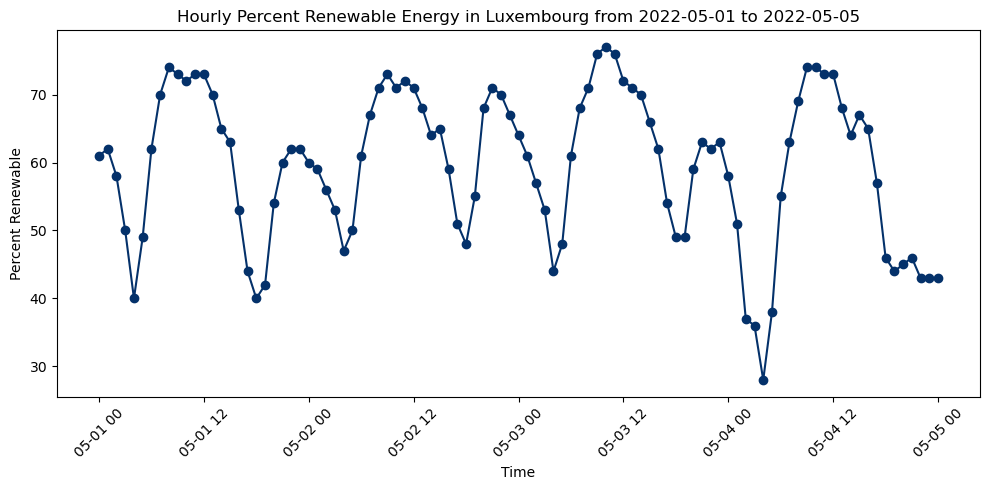

Montenegro


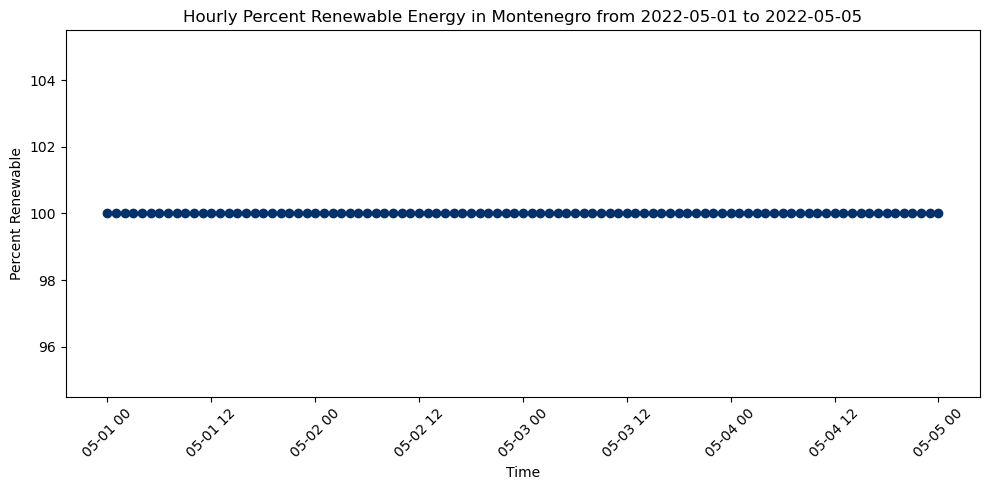

Netherlands


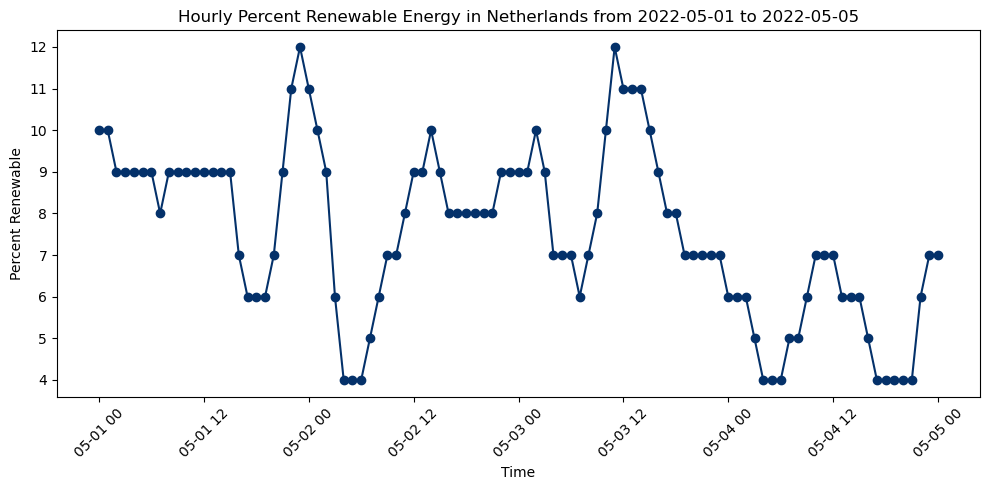

Norway


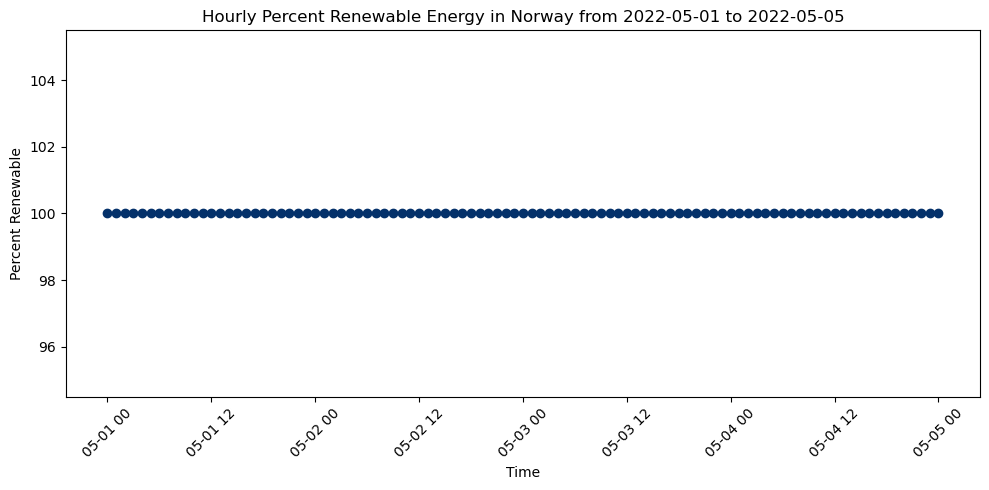

Poland


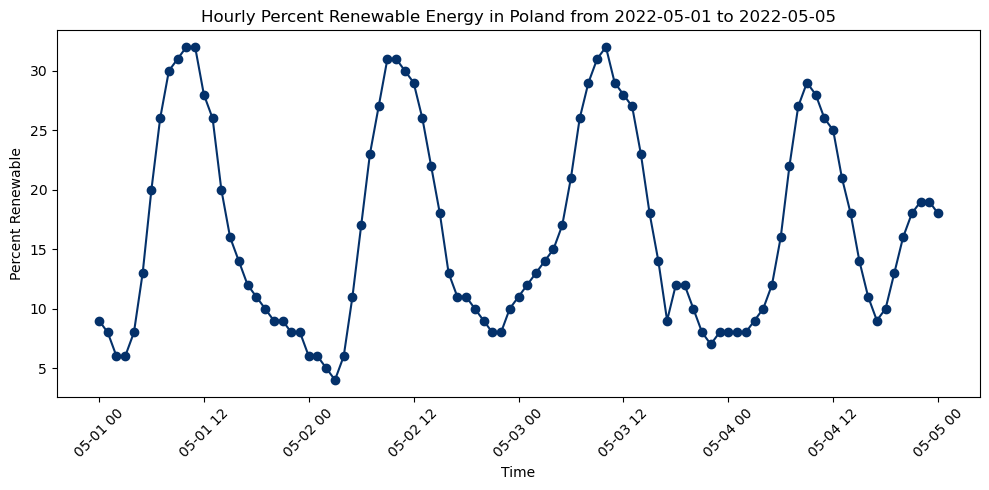

Portugal


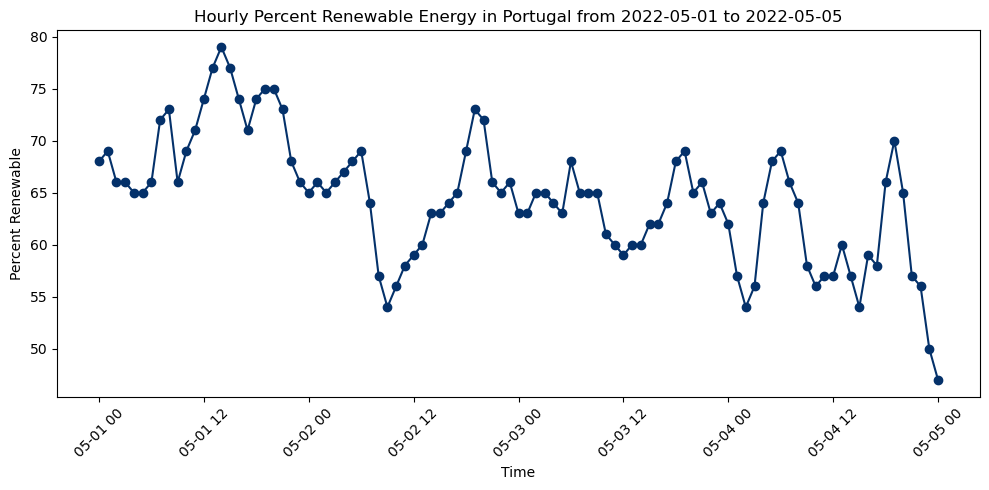

Slovakia


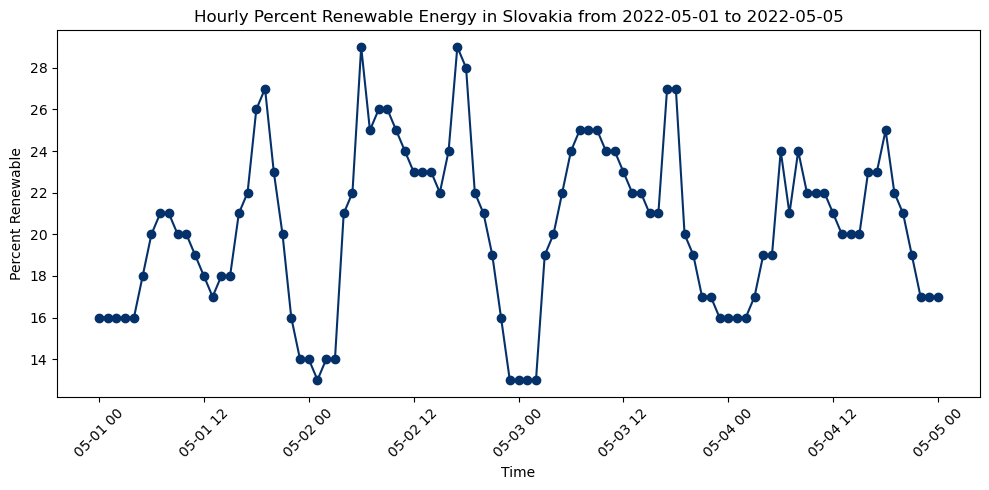

Switzerland


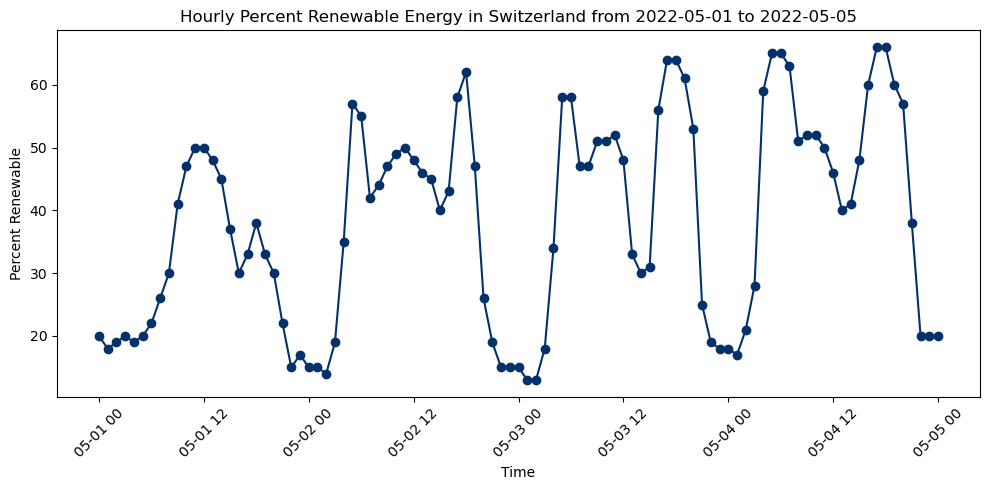

In [49]:
showHourlyPlotsforAllCountries(hourly_start_date,hourly_end_date)

# Energy share plots
---

Index(['Unnamed: 0', 'Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Onshore',
       'startTime', 'endTime', 'renewableTotal', 'renewableTotalWS',
       'nonRenewableTotal', 'total', 'percentRenewable', 'percentRenewableWS'],
      dtype='object')


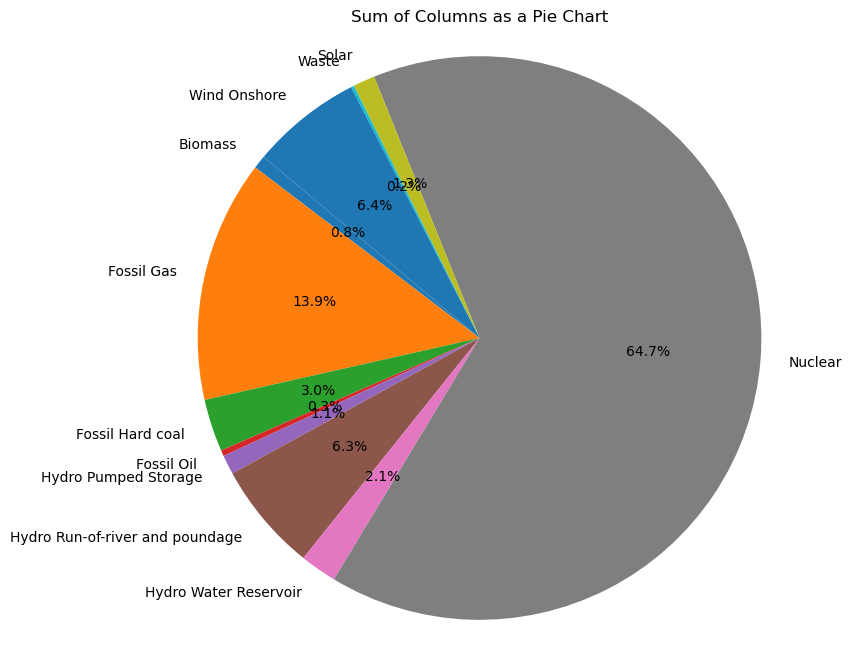

In [47]:
def f5():
    
    csv_file = 'rawData/FR-202001010000-202301010000-actual-60.0.csv'
    start_date = pd.to_datetime('2022-12-01')
    end_date = pd.to_datetime('2022-12-05')
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    print(filtered_data.columns)
    columns_to_sum = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Onshore']
    # Calculate the sum of each column
    column_sums = filtered_data[columns_to_sum].sum()
    # Generate a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sum of Columns as a Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()
    
f5()

Index(['group_id', 'Biomass', 'Fossil Brown coal/Lignite', 'Fossil Gas',
       'Fossil Hard coal', 'Fossil Oil', 'Geothermal', 'Hydro Pumped Storage',
       'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Nuclear',
       'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore',
       'Wind Onshore', 'startTime', 'endTime', 'renewableTotal',
       'renewableTotalWS', 'nonRenewableTotal', 'total', 'percentRenewable',
       'percentRenewableWS'],
      dtype='object')


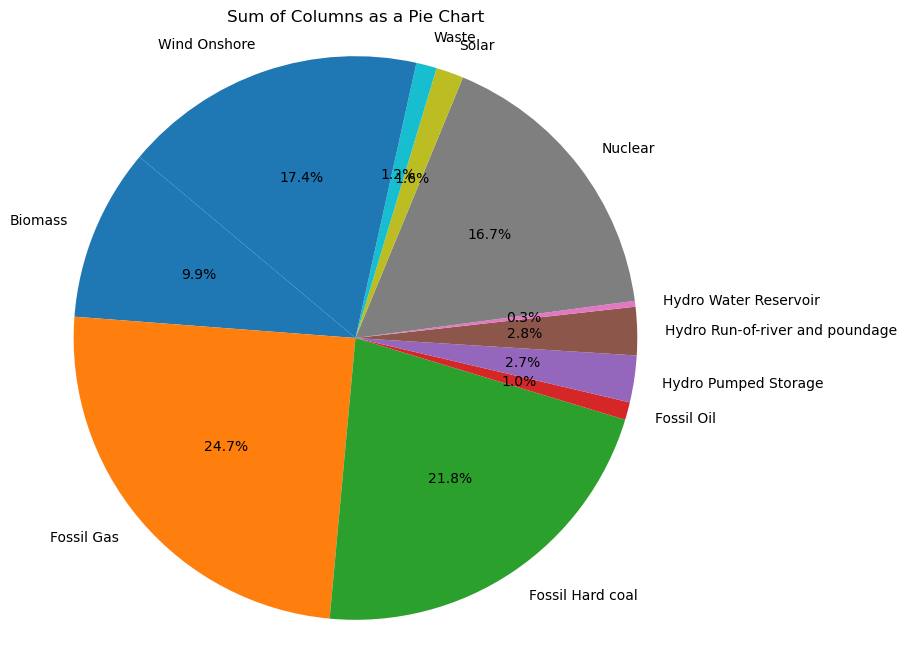

In [50]:
def f6():
    
    csv_file = './rawData/DE-202001010000-202301010000-actual-60.csv'
    start_date = pd.to_datetime('2020-12-01')
    end_date = pd.to_datetime('2020-12-10')
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    print(filtered_data.columns)
    columns_to_sum = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Onshore']
    # Calculate the sum of each column
    column_sums = filtered_data[columns_to_sum].sum()
    # Generate a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sum of Columns as a Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()
    
f6()